**Informe del Análisis de Calidad de Datos:**

Documentar en formato markdown los resultados del análisis de calidad de los datos, identificando problemas encontrados (como valores faltantes o inconsistencias) y detallando las soluciones implementadas para garantizar la confiabilidad del análisis posterior.

Primeras filas del dataset:
     id  amount    status                       created_at  \
0     5   100.0  rejected 2019-12-10 19:05:21.596873+00:00   
1    70   100.0  rejected 2019-12-10 19:50:12.347780+00:00   
2     7   100.0  rejected 2019-12-10 19:13:35.825460+00:00   
3    10    99.0  rejected 2019-12-10 19:16:10.880172+00:00   
4  1594   100.0  rejected 2020-05-06 09:59:38.877376+00:00   

                        updated_at  user_id                     moderated_at  \
0 2019-12-11 16:47:42.407830+00:00    804.0 2019-12-11 16:47:42.405646+00:00   
1 2019-12-11 14:24:22.900054+00:00    231.0 2019-12-11 14:24:22.897988+00:00   
2 2019-12-11 09:46:59.779773+00:00    191.0 2019-12-11 09:46:59.777728+00:00   
3 2019-12-18 14:26:18.136163+00:00    761.0 2019-12-18 14:26:18.128407+00:00   
4 2020-05-07 09:21:55.340080+00:00   7686.0 2020-05-07 09:21:55.320193+00:00   

   deleted_account_id               reimbursement_date  \
0                 NaN 2020-01-09 19:05:21.596363+00:00   
1 

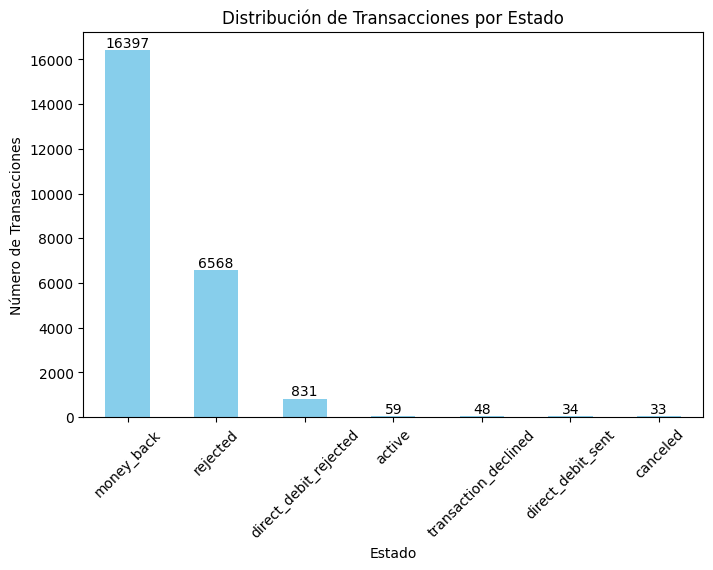


count    2.397000e+04
mean     1.819425e+03
std      1.633700e+03
min      3.055556e-09
25%      2.015635e+01
50%      1.508277e+03
75%      2.922548e+03
max      1.016877e+04
Name: time_to_update, dtype: float64


/var/folders/5j/6t2j9zls237_klqhdt5ljdgr0000gn/T/ipykernel_31485/2640651541.py:11: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['transaction_month'] = df['created_at'].dt.to_period('M')


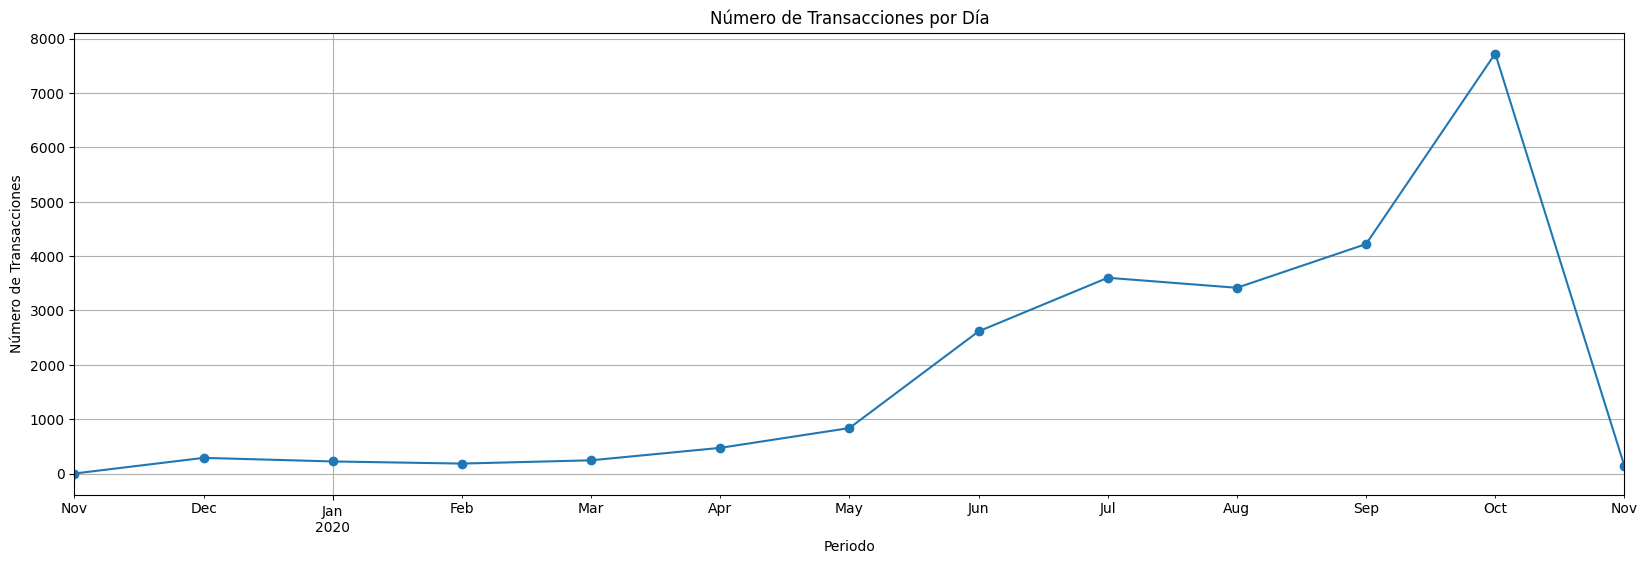

/var/folders/5j/6t2j9zls237_klqhdt5ljdgr0000gn/T/ipykernel_31485/2443900875.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['cohort'] = df['created_at'].dt.to_period('M')


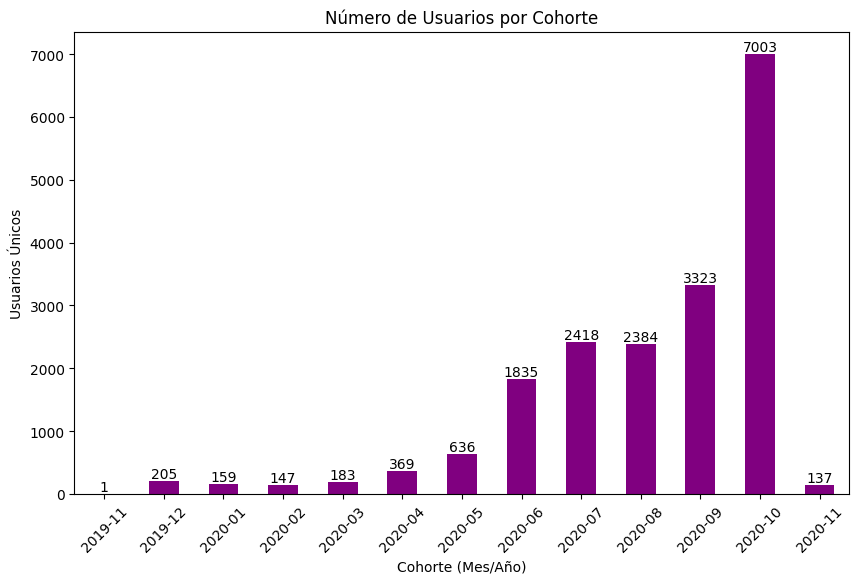

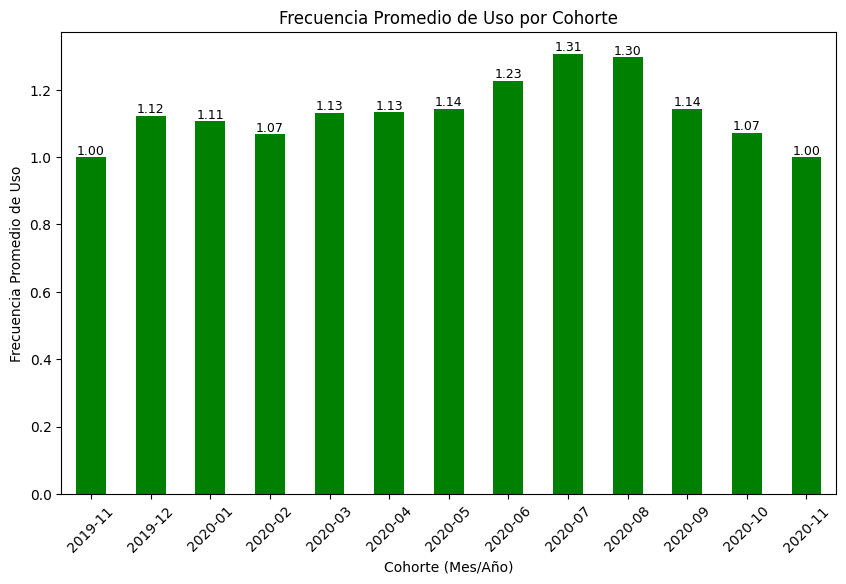

/var/folders/5j/6t2j9zls237_klqhdt5ljdgr0000gn/T/ipykernel_31485/3431240849.py:11: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['cohort'] = df['created_at'].dt.to_period('M')


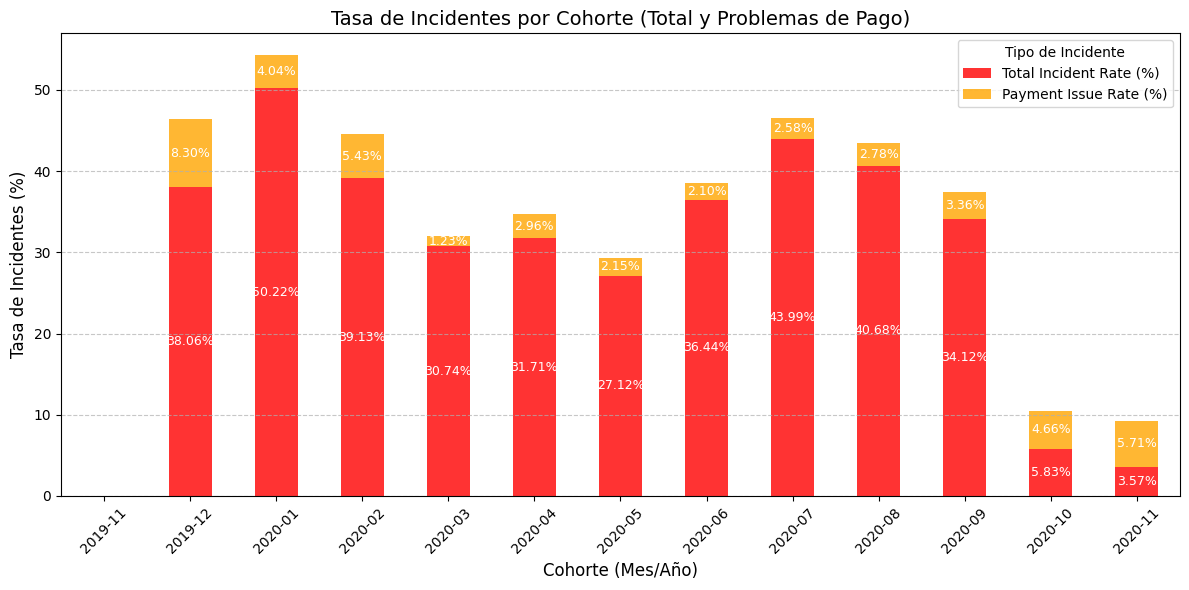

Tasas de Incidentes por Cohorte:

         Total Incident Rate (%)  Payment Issue Rate (%)
cohort                                                  
2019-11                 0.000000                0.000000
2019-12                38.062284                8.304498
2020-01                50.224215                4.035874
2020-02                39.130435                5.434783
2020-03                30.737705                1.229508
2020-04                31.712474                2.959831
2020-05                27.120669                2.150538
2020-06                36.443595                2.103250
2020-07                43.987781                2.582616
2020-08                40.678958                2.780217
2020-09                34.115139                3.364132
2020-10                 5.825243                4.660194
2020-11                 3.571429                5.714286


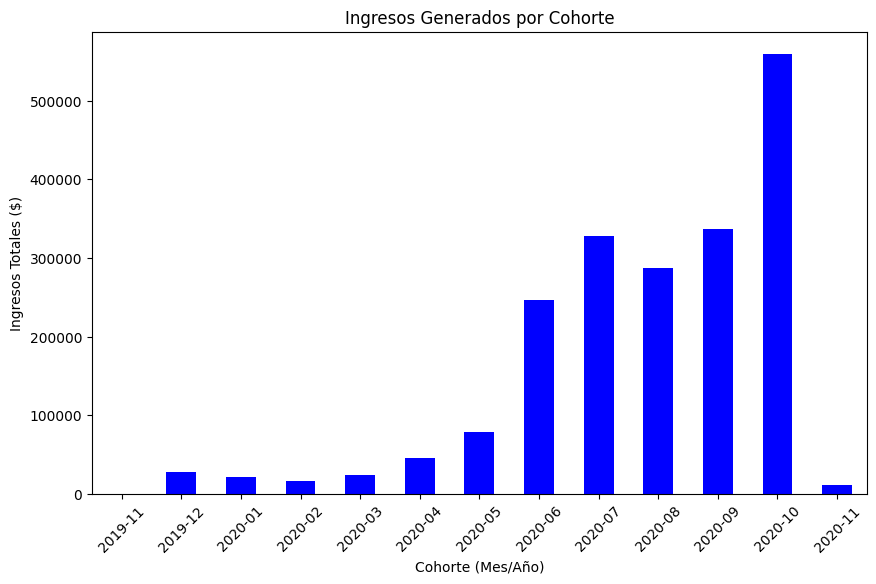

/var/folders/5j/6t2j9zls237_klqhdt5ljdgr0000gn/T/ipykernel_31485/1634637781.py:8: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['cohort'] = df['created_at'].dt.to_period('M')


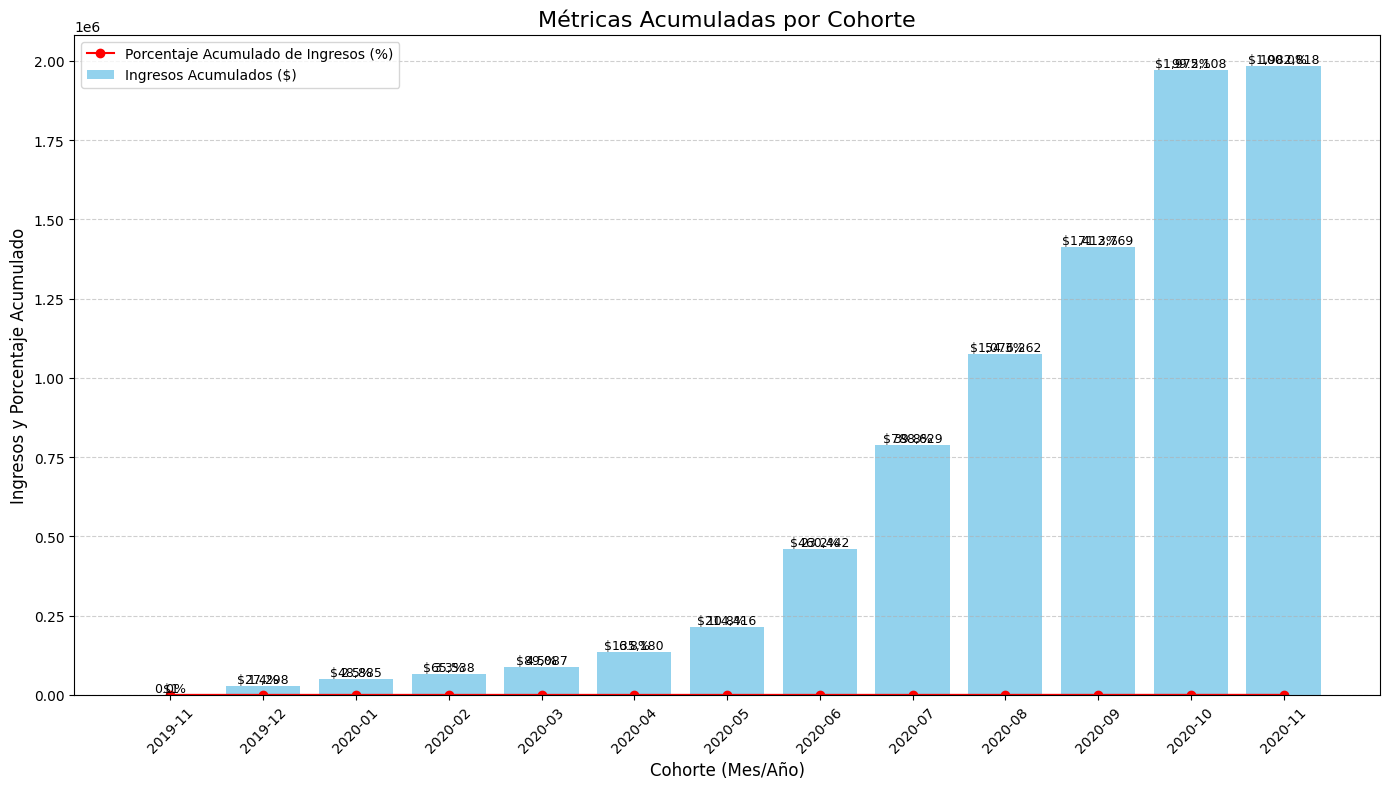

Métricas Acumuladas por Cohorte:

         Total Revenue  Cumulative Revenue  Cumulative Transactions  \
cohort                                                                
2019-11            1.0                 1.0                        1   
2019-12        27297.0             27298.0                      290   
2020-01        21587.0             48885.0                      513   
2020-02        16653.0             65538.0                      697   
2020-03        23549.0             89087.0                      941   
2020-04        46093.0            135180.0                     1414   
2020-05        79236.0            214416.0                     2251   
2020-06       246026.0            460442.0                     4866   
2020-07       328187.0            788629.0                     8467   
2020-08       287633.0           1076262.0                    11884   
2020-09       336507.0           1412769.0                    16105   
2020-10       559339.0           1972108.0 

FileNotFoundError: [Errno 2] No such file or directory: 'dataset/extract - cash request - data analyst.csv'

FileNotFoundError: [Errno 2] No such file or directory: 'dataset/extract - cash request - data analyst.csv'

In [7]:
%run '01-EDA-cashrequest.ipynb'

In [18]:
df_cashrequest = df.copy()

Calidad de los datos:
                        Column  Non_Null_Count  Non_Null_Percentage  \
7           deleted_account_id            2104             8.777639   
8           reimbursement_date            3050            12.724239   
13             recovery_status            3330            13.892365   
15            reco_last_update            3330            13.892365   
14               reco_creation            3330            13.892365   
10             money_back_date           12040            50.229453   
6                 moderated_at           15912            66.382979   
9   cash_request_received_date           16289            67.955778   
12                     send_at           16466            68.694201   
5                      user_id           21867            91.226533   
18                      cohort           23970           100.000000   
17           transaction_month           23970           100.000000   
16              time_to_update           23970         

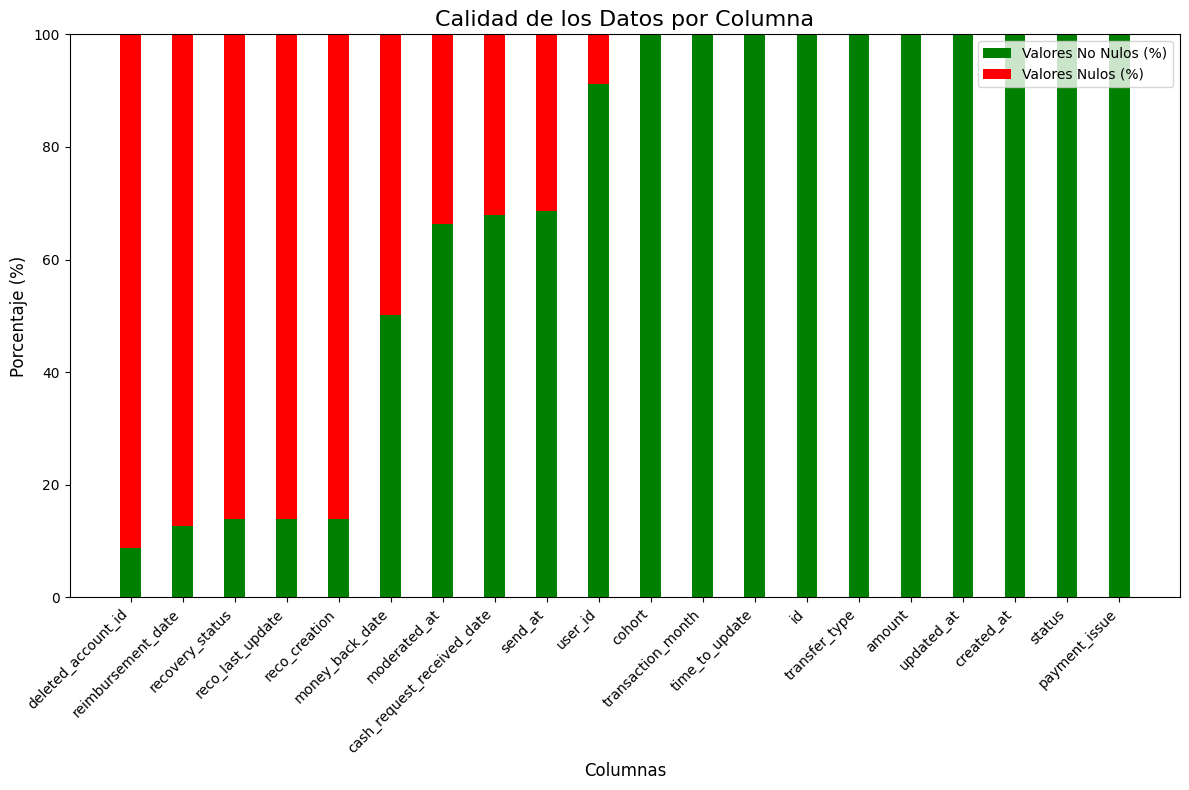

In [ ]:

# Conteo de valores no nulos y nulos
total_rows = len(df_cashrequest)
null_counts = df_cashrequest.isnull().sum()
non_null_counts = total_rows - null_counts

# Creo DataFrame resumen con información de valores correctos y nulos
data_quality_summary = pd.DataFrame({
    'Column': df_cashrequest.columns,
    'Non_Null_Count': non_null_counts.values,
    'Non_Null_Percentage': (non_null_counts.values / total_rows) * 100,
    'Null_Count': null_counts.values,
    'Null_Percentage': (null_counts.values / total_rows) * 100
}).sort_values(by='Null_Count', ascending=False)

# Muestro el resumen en una tabla
print("Calidad de los datos:")
print(data_quality_summary)

# Exporto a un archivo CSV (opcional)
#output_path = "data_quality_summary.csv"
#data_quality_summary.to_csv(output_path, index=False)

# Gráfico para visualizar la calidad de los datos
plt.figure(figsize=(12, 8))
# Agrupo barras de valores nulos y no nulos
width = 0.4
x = range(len(data_quality_summary))

plt.bar(x, data_quality_summary['Non_Null_Percentage'], width, label='Valores No Nulos (%)', color='green')
plt.bar(x, data_quality_summary['Null_Percentage'], width, bottom=data_quality_summary['Non_Null_Percentage'], label='Valores Nulos (%)', color='red')

# Etiqueto
plt.title("Calidad de los Datos por Columna df cash request", fontsize=16)
plt.xlabel("Columnas", fontsize=12)
plt.ylabel("Porcentaje (%)", fontsize=12)
plt.xticks(x, data_quality_summary['Column'], rotation=45, ha='right')
plt.legend()

# Muestro el gráfico
plt.tight_layout()
plt.show()

In [21]:
df_cashrequest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   id                          23970 non-null  int64              
 1   amount                      23970 non-null  float64            
 2   status                      23970 non-null  object             
 3   created_at                  23970 non-null  datetime64[ns, UTC]
 4   updated_at                  23970 non-null  datetime64[ns, UTC]
 5   user_id                     21867 non-null  float64            
 6   moderated_at                15912 non-null  datetime64[ns, UTC]
 7   deleted_account_id          2104 non-null   float64            
 8   reimbursement_date          3050 non-null   datetime64[ns, UTC]
 9   cash_request_received_date  16289 non-null  datetime64[ns]     
 10  money_back_date             12040 non-null  datetime64[ns,

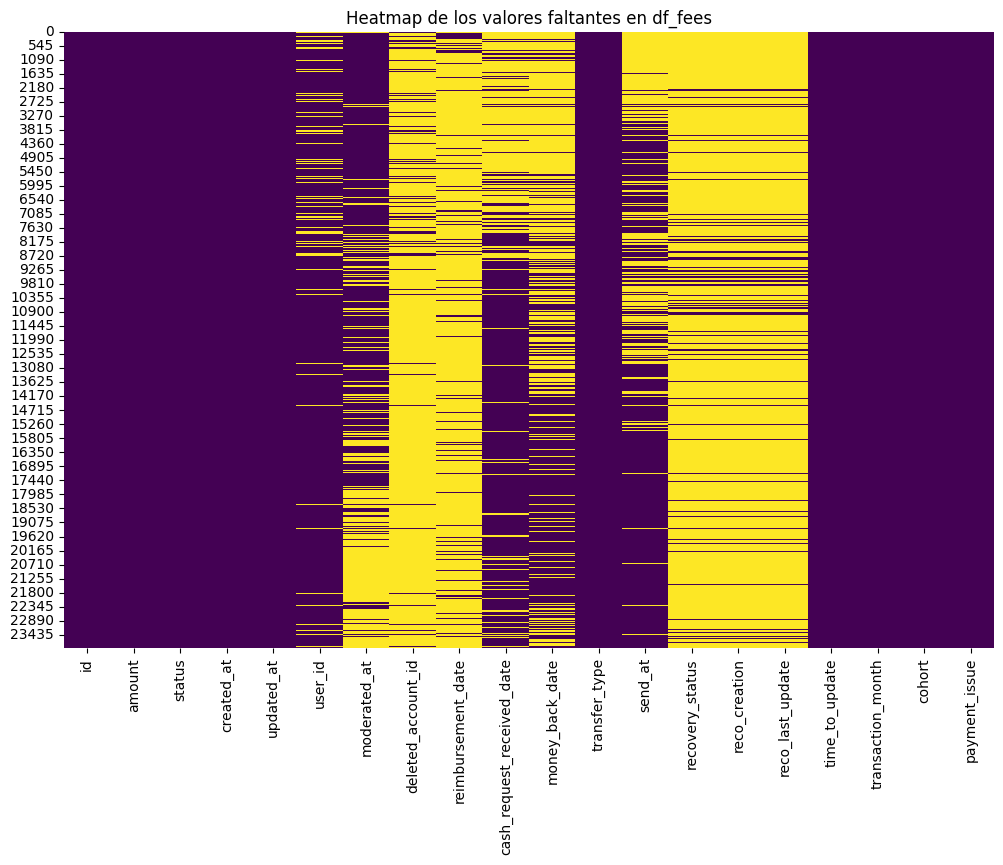

In [22]:
# Heatmap de valores faltantes
plt.figure(figsize=(12, 8))
sns.heatmap(df_cashrequest.isnull(), cbar=False, cmap="viridis")
plt.title("Heatmap de los valores faltantes en df_fees")
plt.show()

Analisis de los valores faltantes

Inspección de las columnas:

Columnas con bastantes valores faltantes: moderated_at, deleted_account_id, reimbursement_date, money_back_date, recovery_status, reco_creation, reco_last_update.
Columnas con algunos valores faltantes: user_id, cash_request_received_date, send_at.

Conexto de los datos:
Para columnas con fecha, se intenta completar según la lógica (e.g., created_at).
Para columnas categóricas (recovery_status, transfer_type), se usa el valor más utilizado, o se apartan.
Para columnas numericas (time_to_update, amount), se usan modelos estadisticos como la media, la mediana o interpolación.

In [29]:
df_cashrequest['recovery_status'].unique()

array([nan, 'completed', 'pending', 'pending_direct_debit', 'cancelled'],
      dtype=object)

In [30]:
df_cashrequest['amount'].describe()

count    23970.000000
mean        82.720818
std         26.528065
min          1.000000
25%         50.000000
50%        100.000000
75%        100.000000
max        200.000000
Name: amount, dtype: float64

Al observar la gráfica y los patrones de los valores faltantes, podemos identificar agrupaciones lógicas y casuísticas basadas en el nombre de las columnas y su relación. Aquí te detallo posibles agrupaciones que explican los datos vacíos:

1. Datos relacionados con cuentas eliminadas o moderadas:
Si deleted_account_id tiene un valor, es probable que moderated_at también lo tenga. Los valores nulos en estas columnas podrían reflejar que:
La cuenta no ha sido eliminada ni moderada, por lo tanto, estos datos no aplican.
- Casuística: "Solo aplica a cuentas eliminadas o moderadas".

2. Fechas relacionadas con transacciones
reimbursement_date, cash_request_received_date, money_back_date, send_at:
Estas fechas están asociadas a transacciones o solicitudes específicas.
La ausencia de una solicitud de reembolso o devolución.
- Casuística: "Fechas dependientes de una acción previa (reembolso, solicitud, etc.)".

3. Estados de recuperación y recomendaciones
recovery_status, reco_creation, reco_last_update:
- Los valores en estas columnas son relevantes solo si el caso pasó por un proceso de recuperación o recomendación.
Los valores nulos podrían reflejar:
Que la cuenta o transacción no tuvo problemas o no requirió recuperación.
Que no hay recomendación asociada.
- Casuística: "Solo aplica a casos con problemas de recuperación o recomendaciones activas".

4. Identificadores y usuarios
user_id:
- Casuística: "Datos faltantes para usuarios no identificados".

5. Variables generales:
transfer_type, payment_issue, status:
Estas columnas parecen completas y probablemente funcionan como "anclas" para las casuísticas mencionadas. Por ejemplo:
Ciertos tipos de transfer_type podrían implicar la falta de fechas como reimbursement_date o cash_request_received_date.
El estado de payment_issue puede justificar valores faltantes en columnas relacionadas con recuperación.

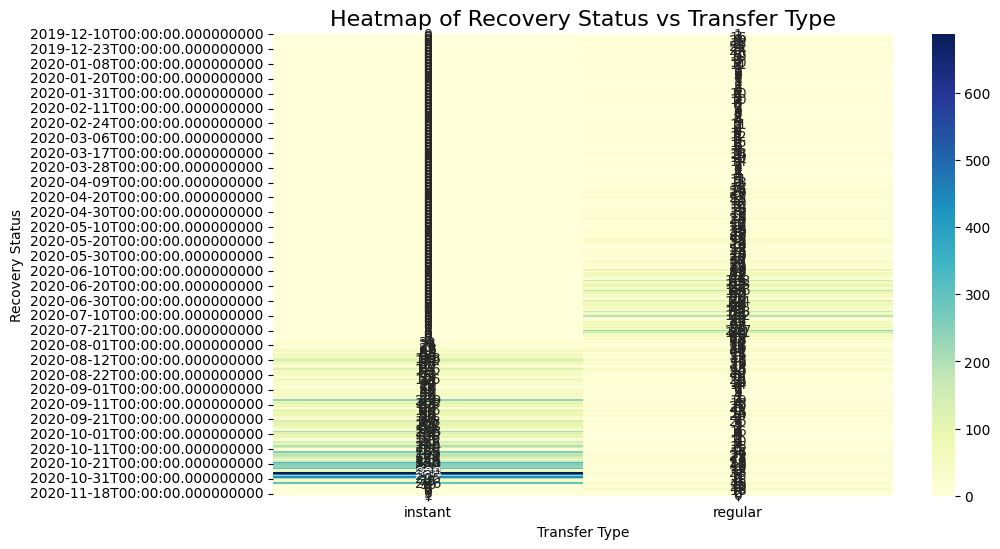

In [32]:
# Crear una tabla de contingencia para columnas categóricas
crosstab = pd.crosstab(df['cash_request_received_date'], df['transfer_type'])

# Visualizar la tabla de contingencia como un heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(crosstab, annot=True, cmap="YlGnBu", fmt='d', cbar=True)
plt.title("Heatmap of Recovery Status vs Transfer Type", fontsize=16)
plt.xlabel("Transfer Type")
plt.ylabel("Recovery Status")
plt.show()


In [34]:
pip install ace_tools

--- Logging error ---
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/console.py", line 1673, in print
    extend(render(renderable, render_options))
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/console.py", line 1305, in render
    for render_output in iter_render:
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_internal/utils/logging.py", line 134, in __rich_console__
    for line in lines:
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/segment.py", line 249, in split_lines
    for segment in segments:
  File "/Library/

In [35]:
#Análisis de correlación
# Analyzing cases where `deleted_account_id` is empty
deleted_account_empty = df[df['deleted_account_id'] == 0]

# Checking the distribution of other related columns for these cases
empty_deleted_analysis = deleted_account_empty[['moderated_at', 'recovery_status', 'reimbursement_date', 'cash_request_received_date', 'money_back_date']].isnull().sum()

# Percentage of missing values in these related columns for rows where `deleted_account_id` is empty
empty_deleted_percentage = (empty_deleted_analysis / len(deleted_account_empty)) * 100

# Displaying the analysis
import ace_tools as tools; tools.display_dataframe_to_user(name="Empty Deleted Account Analysis", dataframe=deleted_account_empty)

empty_deleted_percentage



ModuleNotFoundError: No module named 'ace_tools'

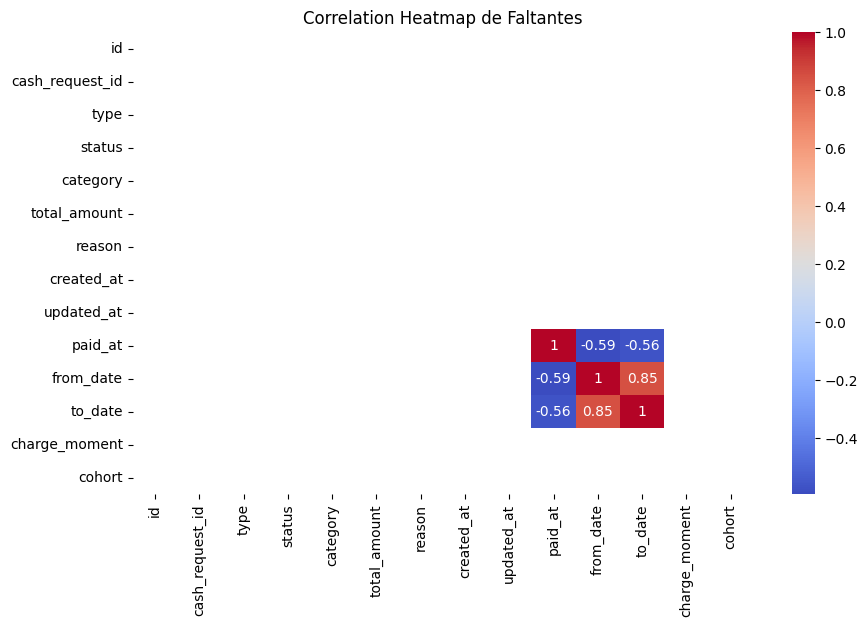

In [23]:
# Binary DataFrame para valores faltantes
missing_binary = df_fees.isnull().astype(int)

# correlacion de faltantes
missing_corr = missing_binary.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(missing_corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap de Faltantes")
plt.show()


Correlación de faltantes:
Los valores faltantes de from_date, to_date ypaid_at están altamente correlacionados (~0,85 entre from_date y to_date, -0,59 conpaid_at), lo que indica que cuando falta uno de estos, es probable que también falten otros.

Información procesable: esta fuerte relación sugiere una dependencia temporal, y podemos considerar imputar estas columnas de forma conjunta utilizando modelos de interpolación o regresión.

In [24]:
# Cross-tabulation with 'reason' and 'type'
print(pd.crosstab(df_fees['category'], df_fees['reason']))
print(pd.crosstab(df_fees['category'], df_fees['type']))

reason                  Instant Payment Cash Request 10000  \
category                                                     
month_delay_on_payment                                   0   
rejected_direct_debit                                    1   

reason                  Instant Payment Cash Request 10003  \
category                                                     
month_delay_on_payment                                   0   
rejected_direct_debit                                    1   

reason                  Instant Payment Cash Request 10010  \
category                                                     
month_delay_on_payment                                   0   
rejected_direct_debit                                    1   

reason                  Instant Payment Cash Request 10012  \
category                                                     
month_delay_on_payment                                   0   
rejected_direct_debit                                    1   

reas

##Imputación de los datos de las columnas con datos faltantes##

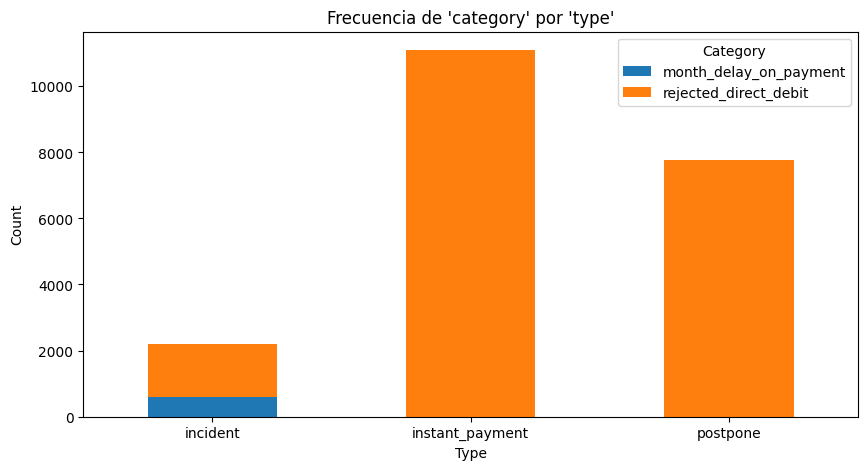

In [27]:
# Agrupar  'type' 7 'category'
category_type_counts = df_fees.groupby(['type', 'category']).size().unstack(fill_value=0)

# Plot
category_type_counts.plot(kind='bar', stacked=True, figsize=(10, 5))
plt.title("Frecuencia de 'category' por 'type'")
plt.ylabel("Count")
plt.xlabel("Type")
plt.legend(title='Category')
plt.xticks(rotation=0)
plt.show()



Observaciones clave
Tipo de incidente:

Contiene una combinación de débito_directo_rechazado y retraso_del_mes_en_pago.
Sin embargo, el débito_directo_rechazado es más frecuente que el retraso_del_mes_en_pago.
pago_instantáneo y posponer Tipos:

Ambos están asociados exclusivamente con la categoría de débito_directo_rechazado.
No hay casos de Month_delay_on_paid para estos tipos.

In [28]:
# Función para imputar 'category'
def impute_category(row):
    if pd.isnull(row['category']):
        if row['type'] in ['instant_payment', 'postpone']:
            return 'rejected_direct_debit'
        elif row['type'] == 'incident':
            # Assign based on observed proportions
            return 'rejected_direct_debit' if np.random.rand() < 0.8 else 'month_delay_on_payment'
    return row['category']

# Aplicar la función al df
df_fees['category'] = df_fees.apply(impute_category, axis=1)
df_fees['category'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 21061 entries, 0 to 21060
Series name: category
Non-Null Count  Dtype 
--------------  ----- 
21061 non-null  object
dtypes: object(1)
memory usage: 164.7+ KB


Paso 1: comprender las relaciones entre columnas
from_date y to_date:

Estos están fuertemente correlacionados (correlación de 0,85).
from_date siempre debe ser anterior a to_date.
pagado_en:

Representa una fecha de pago. Normalmente debería ocurrir después de from_date y antes de to_date.

In [30]:
# Convert 'from_date' and 'to_date' to numeric (timestamps)
df_fees['from_date_numeric'] = df_fees['from_date'].astype('int64')  # Convert datetime to nanoseconds
df_fees['to_date_numeric'] = df_fees['to_date'].astype('int64')

# Interpolate missing values for the numeric columns
df_fees['from_date_numeric'] = df_fees['from_date_numeric'].interpolate(method='linear')
df_fees['to_date_numeric'] = df_fees['to_date_numeric'].interpolate(method='linear')

# Convert back to datetime
df_fees['from_date'] = pd.to_datetime(df_fees['from_date_numeric'], unit='ns')
df_fees['to_date'] = pd.to_datetime(df_fees['to_date_numeric'], unit='ns')

# Drop temporary numeric columns
df_fees.drop(columns=['from_date_numeric', 'to_date_numeric'], inplace=True)

# Validate the results
print("Remaining missing values in 'from_date':", df_fees['from_date'].isnull().sum())
print("Remaining missing values in 'to_date':", df_fees['to_date'].isnull().sum())


Remaining missing values in 'from_date': 14312
Remaining missing values in 'to_date': 14549


Esta fue una primera prueba realizada, donde no funcionó la interpolación con valores vecinos, debido a los espacios que hay unos entre otros. Por eso quedaron tantos datos faltantes, y muchos otros como NAT. 

A continuación una prueba dos, donde se plantea la siguiente lógica:

- Si paid_at existe, from_date puede ser predeterminado en paid_at - X días.
- Si from_date existe pero to_date no, establezca to_date = from_date + default_duration.
- Completar los espacios restantes con valores medios o medianos de from_date y to_date para el conjunto de datos

In [38]:
# Calcular la duración media en dias entre  'from_date' y 'to_date' exist
df_fees['duration_days'] = (df_fees['to_date'] - df_fees['from_date']).dt.days
mean_duration_days = df_fees['duration_days'].mean()
mean_duration_days

np.float64(20.382323232323234)

In [44]:
# Convert 'from_date' and 'to_date' to UTC (timezone-aware)
df_fees['from_date'] = pd.to_datetime(df_fees['from_date'], utc=True)
df_fees['to_date'] = pd.to_datetime(df_fees['to_date'], utc=True)

# Convert 'from_date' and 'to_date' to numeric timestamps
median_from_date = pd.to_datetime(df_fees['from_date']).dropna().astype('int64').median()
median_to_date = pd.to_datetime(df_fees['to_date']).dropna().astype('int64').median()

# Convert the median back to datetime
median_from_date = pd.to_datetime(median_from_date, unit='ns')
median_to_date = pd.to_datetime(median_to_date, unit='ns')

# Fill missing 'from_date' and 'to_date' with their respective medians
df_fees['from_date'].fillna(median_from_date, inplace=True)
df_fees['to_date'].fillna(median_to_date, inplace=True)

# Validate the results
print("Remaining missing values in 'from_date':", df_fees['from_date'].isnull().sum())
print("Remaining missing values in 'to_date':", df_fees['to_date'].isnull().sum())



Remaining missing values in 'from_date': 0
Remaining missing values in 'to_date': 0


/var/folders/5j/6t2j9zls237_klqhdt5ljdgr0000gn/T/ipykernel_26843/2563924956.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_fees['from_date'].fillna(median_from_date, inplace=True)
/var/folders/5j/6t2j9zls237_klqhdt5ljdgr0000gn/T/ipykernel_26843/2563924956.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2020-10-13 16:55:18.662350080' has dtype incompatible with datetime64[ns, UTC], please explicitly cast to a compatible dtype first.

In [51]:
# Convert 'from_date', 'to_date', and 'paid_at' to UTC timezone-aware
df_fees['from_date'] = pd.to_datetime(df_fees['from_date'], utc=True)
df_fees['to_date'] = pd.to_datetime(df_fees['to_date'], utc=True)
df_fees['paid_at'] = pd.to_datetime(df_fees['paid_at'], utc=True)

# Computar una fecha media para 'paid_at'
df_fees['paid_at'] = df_fees.apply(
    lambda row: row['from_date'] + (row['to_date'] - row['from_date']) / 2
    if pd.isnull(row['paid_at']) else row['paid_at'], axis=1
)

# Validate the results
print("Remaining missing values in 'paid_at':", df_fees['paid_at'].isnull().sum())


Remaining missing values in 'paid_at': 0


In [55]:
# Validate temporal consistency
df_fees['valid_dates'] = (df_fees['from_date'] <= df_fees['paid_at']) & (df_fees['paid_at'] <= df_fees['to_date'])

# Identify inconsistent rows
invalid_rows = df_fees[~df_fees['valid_dates']]
print(f"Number of rows with invalid date relationships: {len(invalid_rows)}")

# Display invalid rows if any
if not invalid_rows.empty:
    print(invalid_rows[['from_date', 'paid_at', 'to_date']])



Number of rows with invalid date relationships: 2231
                      from_date                          paid_at  \
11    2020-10-26 22:00:00+00:00 2020-10-21 09:00:25.398771+00:00   
22    2020-11-05 22:00:00+00:00 2020-10-22 09:52:50.145043+00:00   
28    2020-11-05 22:00:00+00:00 2020-10-31 02:24:27.115811+00:00   
30    2020-10-31 11:00:00+00:00 2020-10-30 18:36:02.487410+00:00   
36    2020-11-04 13:12:00+00:00 2020-11-01 06:36:36.505810+00:00   
...                         ...                              ...   
18693 2020-11-10 23:51:00+00:00 2020-10-28 11:53:09.315721+00:00   
18695 2020-11-04 22:00:00+00:00 2020-10-29 03:12:04.551864+00:00   
18700 2020-11-09 23:00:00+00:00 2020-10-30 16:51:56.013948+00:00   
18701 2020-11-08 11:00:00+00:00 2020-11-01 01:03:58.609062+00:00   
18706 2020-11-03 11:00:00+00:00 2020-11-01 22:49:52.417354+00:00   

                        to_date  
11    2020-10-30 23:00:00+00:00  
22    2020-12-05 11:00:00+00:00  
28    2020-11-07 11:00:00+00

In [56]:
# Adjust invalid rows
df_fees.loc[~df_fees['valid_dates'], 'paid_at'] = df_fees.loc[~df_fees['valid_dates'], 'from_date'] + \
                                                  (df_fees.loc[~df_fees['valid_dates'], 'to_date'] - df_fees.loc[~df_fees['valid_dates'], 'from_date']) / 2

# Re-validate
df_fees['valid_dates'] = (df_fees['from_date'] <= df_fees['paid_at']) & (df_fees['paid_at'] <= df_fees['to_date'])
print(f"Number of rows with invalid date relationships after fixing: {len(df_fees[~df_fees['valid_dates']])}")


Number of rows with invalid date relationships after fixing: 76


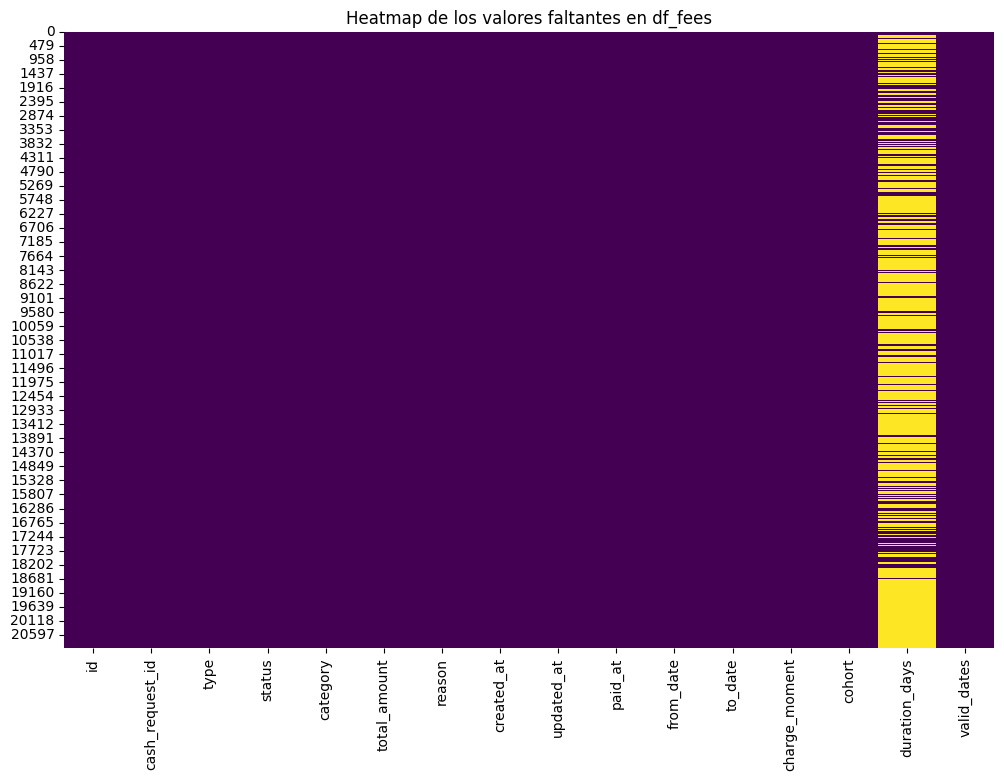

In [54]:
# Heatmap de valores faltantes
plt.figure(figsize=(12, 8))
sns.heatmap(df_fees.isnull(), cbar=False, cmap="viridis")
plt.title("Heatmap de los valores faltantes en df_fees")
plt.show()

In [57]:
# Compute durations
df_fees['duration_days'] = (df_fees['to_date'] - df_fees['from_date']).dt.days
df_fees['time_to_payment_days'] = (df_fees['paid_at'] - df_fees['from_date']).dt.days

# Display summary statistics
print("Summary of durations:")
print(df_fees['duration_days'].describe())

print("Summary of time to payment:")
print(df_fees['time_to_payment_days'].describe())


Summary of durations:
count    21061.000000
mean        20.228574
std          7.229693
min       -104.000000
25%         20.000000
50%         20.000000
75%         20.000000
max         92.000000
Name: duration_days, dtype: float64
Summary of time to payment:
count    21061.000000
mean        16.025972
std          6.158969
min        -52.000000
25%         14.000000
50%         20.000000
75%         20.000000
max         28.000000
Name: time_to_payment_days, dtype: float64


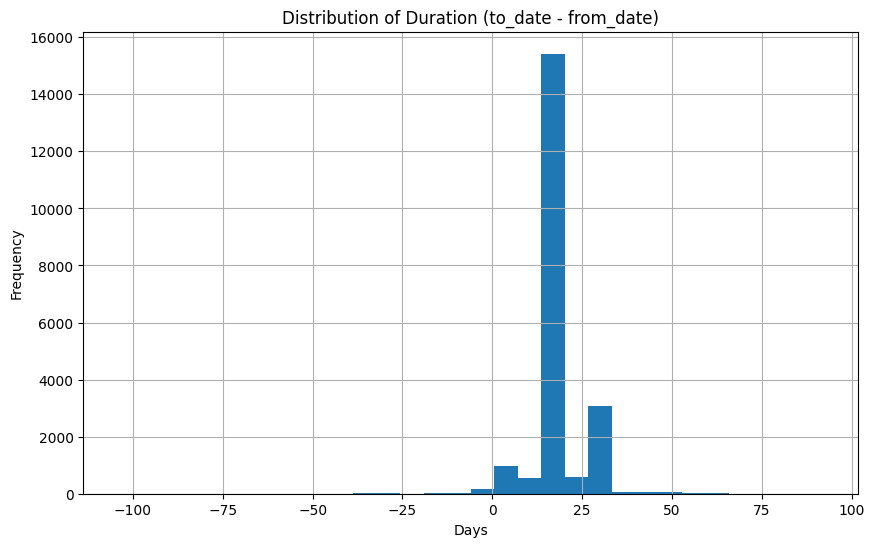

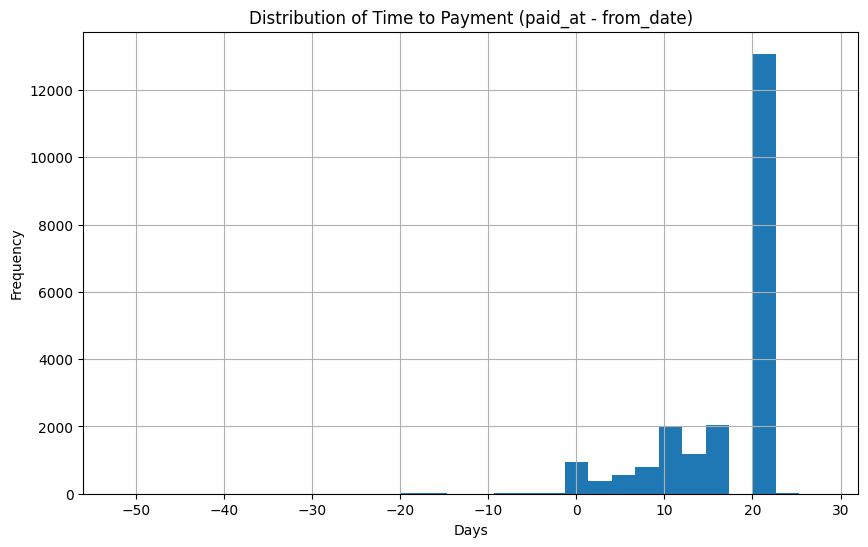

In [58]:
import matplotlib.pyplot as plt

# Histogram of durations
plt.figure(figsize=(10, 6))
df_fees['duration_days'].hist(bins=30)
plt.title("Distribution of Duration (to_date - from_date)")
plt.xlabel("Days")
plt.ylabel("Frequency")
plt.show()

# Histogram of time to payment
plt.figure(figsize=(10, 6))
df_fees['time_to_payment_days'].hist(bins=30)
plt.title("Distribution of Time to Payment (paid_at - from_date)")
plt.xlabel("Days")
plt.ylabel("Frequency")
plt.show()


In [61]:
# Identify rows with negative durations
negative_durations = df_fees[df_fees['duration_days'] < 0]
print(f"Number of rows with negative durations: {len(negative_durations)}")

# Fix negative durations by setting 'to_date' to 'from_date' + mean_duration_days
df_fees.loc[df_fees['duration_days'] < 0, 'to_date'] = \
    df_fees.loc[df_fees['duration_days'] < 0, 'from_date'] + pd.Timedelta(days=mean_duration_days)

# Recompute durations
df_fees['duration_days'] = (df_fees['to_date'] - df_fees['from_date']).dt.days

# Validate the fix
print("Negative durations after fixing:", len(df_fees[df_fees['duration_days'] < 0]))


Number of rows with negative durations: 76
Negative durations after fixing: 0


In [63]:
# Identify rows with negative time to payment
negative_time_to_payment = df_fees[df_fees['time_to_payment_days'] < 0]
print(f"Number of rows with negative time to payment: {len(negative_time_to_payment)}")

# Fix negative 'paid_at' by setting it to the midpoint between 'from_date' and 'to_date'
df_fees.loc[df_fees['time_to_payment_days'] < 0, 'paid_at'] = \
    df_fees.loc[df_fees['time_to_payment_days'] < 0, 'from_date'] + \
    (df_fees.loc[df_fees['time_to_payment_days'] < 0, 'to_date'] - df_fees.loc[df_fees['time_to_payment_days'] < 0, 'from_date']) / 2

# Recompute time to payment
df_fees['time_to_payment_days'] = (df_fees['paid_at'] - df_fees['from_date']).dt.days

# Validate the fix
print("Negative time to payment after fixing:", len(df_fees[df_fees['time_to_payment_days'] < 0]))


Number of rows with negative time to payment: 76
Negative time to payment after fixing: 0


In [64]:
# Validate temporal relationships
df_fees['valid_dates'] = (df_fees['from_date'] <= df_fees['paid_at']) & (df_fees['paid_at'] <= df_fees['to_date'])
invalid_rows = df_fees[~df_fees['valid_dates']]
print(f"Rows with invalid date relationships: {len(invalid_rows)}")

Rows with invalid date relationships: 0


In [66]:
df_fees.describe()

,id,cash_request_id,total_amount,duration_days,time_to_payment_days
count,21061.000000,21061.000000,21061.000000,21061.000000,21061.000000
mean,10645.355111,16317.671715,5.000237,20.396515,16.110916
std,6099.315256,6655.756850,0.034453,6.439866,5.846708
min,1.000000,1456.000000,5.000000,0.000000,0.000000
25%,5385.000000,11745.000000,5.000000,20.000000,14.000000
50%,10652.000000,17157.000000,5.000000,20.000000,20.000000
75%,15925.000000,21795.000000,5.000000,20.000000,20.000000
max,21193.000000,27010.000000,10.000000,92.000000,28.000000


In [68]:
# Guardar 'fees_new' como 'dataset.csv'
fees_new = df_fees

fees_new.to_csv('dataset.csv', index=False)
print("Los datos limpios han sido guardados como 'dataset.csv'")

Los datos limpios han sido guardados como 'dataset.csv'
